### CHURN MODELLING USING ANN:

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import warnings, datetime
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATA/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Gender'>

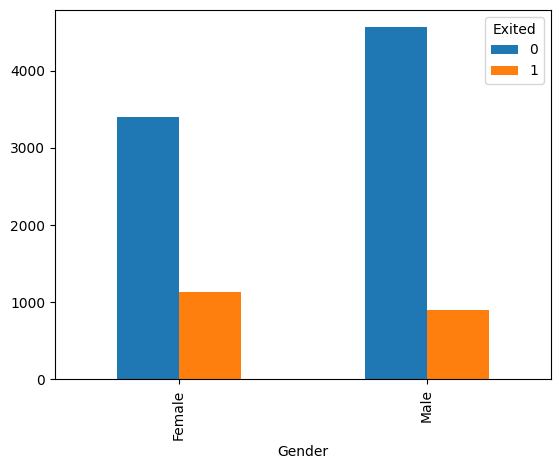

In [7]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar')

<Axes: xlabel='Geography'>

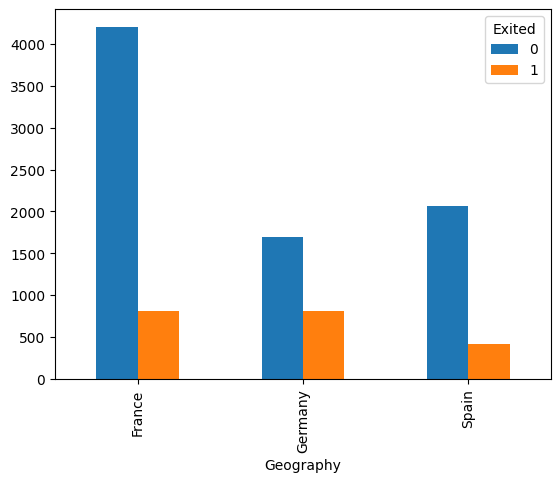

In [8]:
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar')

<Axes: xlabel='HasCrCard'>

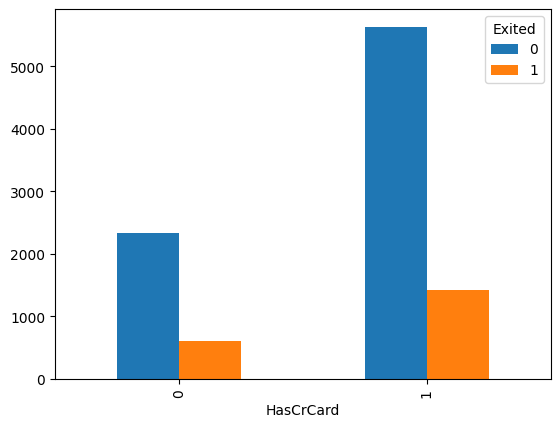

In [9]:
pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar')

<Axes: xlabel='IsActiveMember'>

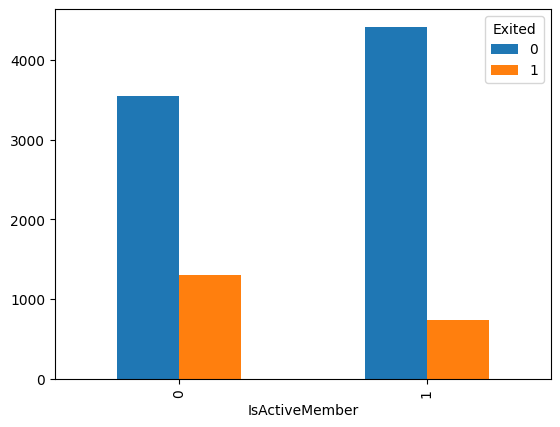

In [10]:
pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar')

In [11]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
print(cat_columns)

['Geography', 'Gender']


In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])
geo_encoder = LabelEncoder()
df['Geography'] = geo_encoder.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [14]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [15]:
churn_scaler = StandardScaler()
X = churn_scaler.fit_transform(X)
print(X)

[[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


In [16]:
with open('DATA/geo_encoder.pkl', 'wb') as f:
    pickle.dump(geo_encoder, f)
with open('DATA/gender_encoder.pkl', 'wb') as f:
    pickle.dump(gender_encoder, f)
with open('DATA/churn_scaler.pkl', 'wb') as f:
    pickle.dump(churn_scaler, f)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000,) (2000,)


In [18]:
X_train[0].shape

(10,)

In [19]:
model = Sequential([
    Flatten(input_shape = (10,)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
]
)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
logdir = 'LOGS/' + datetime.datetime.now().strftime("%d.%m.%Y-%H%M%S")
tensor_board_callback = TensorBoard(log_dir=logdir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [21]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs = 20,
    callbacks = [early_stopping_callback, tensor_board_callback]
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6706 - loss: 0.5770 - val_accuracy: 0.8235 - val_loss: 0.4262
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - loss: 0.4177 - val_accuracy: 0.8370 - val_loss: 0.4009
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3764 - val_accuracy: 0.8450 - val_loss: 0.3836
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.3661 - val_accuracy: 0.8485 - val_loss: 0.3732
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3580 - val_accuracy: 0.8480 - val_loss: 0.3687
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8553 - loss: 0.3523 - val_accuracy: 0.8455 - val_loss: 0.3642
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3486 - val_accuracy: 0.8510 - val_loss: 0.3616
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8636 - loss: 0.3384 - val_accuracy: 0.

In [22]:
import tensorboard

In [23]:
model.save('MODEL/churn_model.h5')

In [24]:
model = tensorflow.keras.models.load_model('MODEL/churn_model.h5')

print(model.predict(np.array([[850,	2,	0,	43,	2,	125510.82,	1,	1,	1,	79084.10]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.]]


In [25]:
list(gender_encoder.classes_)

['Female', 'Male']